In [20]:
!pip install finance_datareader

Defaulting to user installation because normal site-packages is not writeable


In [23]:
!pip install bs4

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 115 kB 1.8 MB/s eta 0:00:01
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=daeb91c806bc93326afee6616ff4308412f88b46e67bf13444fec4c2bb89b27a
  Stored in directory: /home/lab11/.cache/pip/wheels/19/f5/6d/a97dd4f22376d4472d5f4c76c7646876052ff3166b3cf71050
Successfully built bs4


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import FinanceDataReader as fdr

In [2]:
from datetime import datetime
start = datetime(2010, 1, 1)
end = datetime(2020, 12, 31)

In [26]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd

GL = fdr.StockListing('KOSPI')
GL.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"이현우, 박대현",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
6,152100,KOSPI,ARIRANG 200,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7,295820,KOSPI,ARIRANG 200동일가중,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8,253150,KOSPI,ARIRANG 200선물레버리지,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [29]:
df = fdr.DataReader('KS11', start=start, end=end) #Kospi 지수
df.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2010-01-04,1696.14,1681.71,1696.14,1681.71,296550000.0,0.0079
2010-01-05,1690.62,1701.62,1702.39,1686.45,408850000.0,-0.0033
2010-01-06,1705.32,1697.88,1706.89,1696.10,426040000.0,0.0087
2010-01-07,1683.45,1702.92,1707.90,1683.45,462400000.0,-0.0128
2010-01-08,1695.26,1694.06,1695.26,1668.84,379950000.0,0.0070


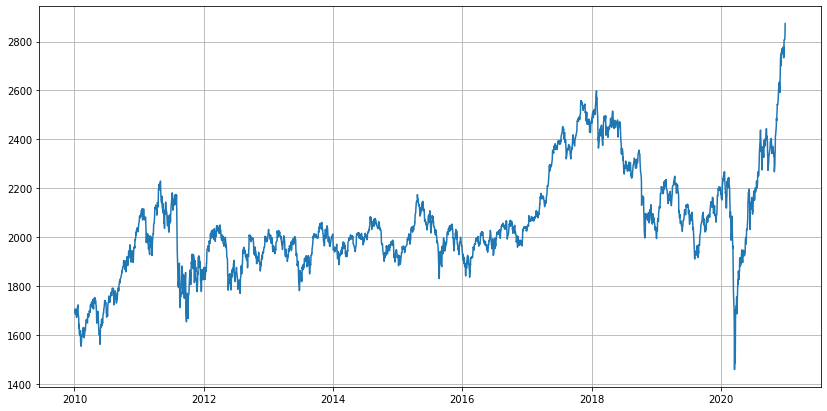

In [30]:
plt.figure(figsize=(14,7))
plt.plot(df['Close'])
plt.grid()
plt.show()

In [31]:
df_Trunc = df[:'2019-12-31']
df_Trunc.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2019-12-23,2203.71,2208.22,2209.20,2196.43,502030000.0,-0.0002
2019-12-24,2190.08,2206.23,2206.23,2187.58,569970000.0,-0.0062
2019-12-26,2197.93,2192.22,2198.01,2183.90,571310000.0,0.0036
2019-12-27,2204.21,2183.70,2215.55,2177.40,490170000.0,0.0029
2019-12-30,2197.67,2202.62,2208.04,2195.65,416400000.0,-0.0030


In [34]:
DF = pd.DataFrame({'ds':df_Trunc.index, 'y':df_Trunc['Close']})
DF.reset_index(inplace=True)
del DF['Date']
DF.head()

,ds,y
0,2010-01-04,1696.14
1,2010-01-05,1690.62
2,2010-01-06,1705.32
3,2010-01-07,1683.45
4,2010-01-08,1695.26


In [35]:
from fbprophet import Prophet

m = Prophet()
m.fit(DF)

Importing plotly failed. Interactive plots will not work.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [38]:
future = m.make_future_dataframe(periods=367)
future.tail()

,ds
2829,2020-12-27
2830,2020-12-28
2831,2020-12-29
2832,2020-12-30
2833,2020-12-31


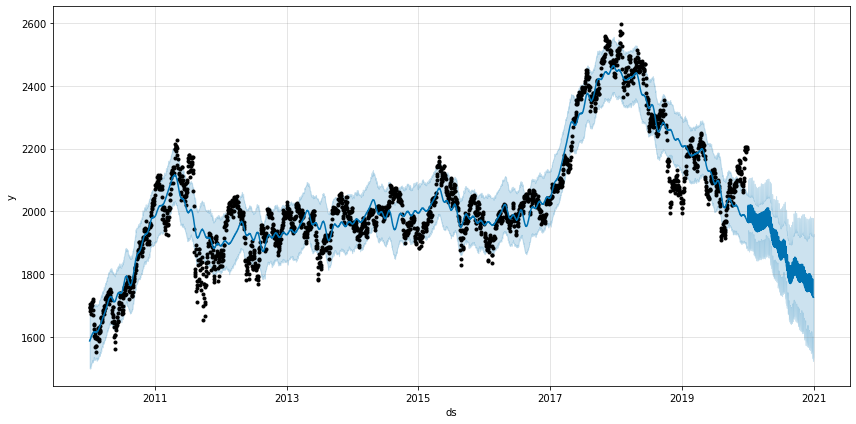

In [42]:
forecast = m.predict(future)
m.plot(forecast, figsize=(12,6));

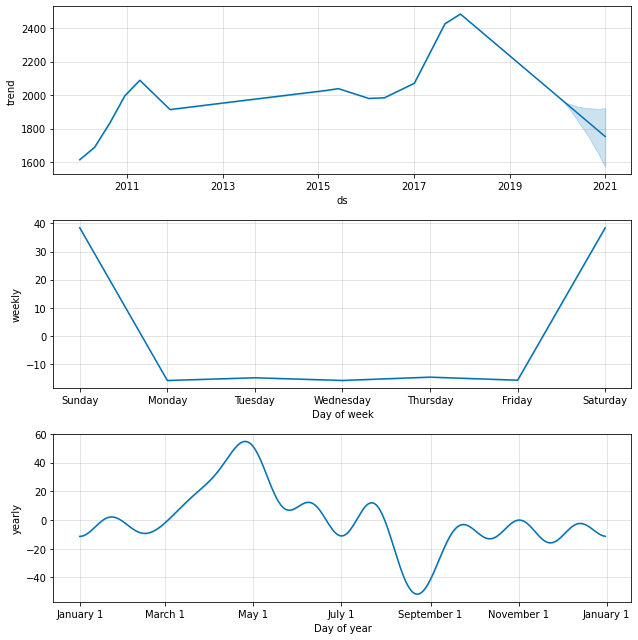

In [43]:
m.plot_components(forecast);

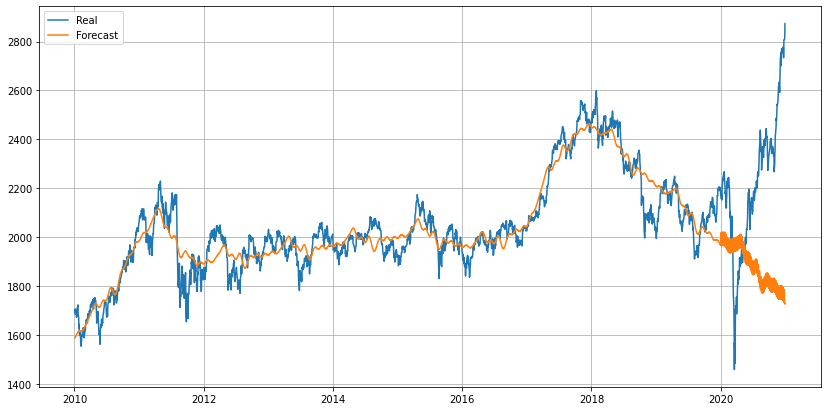

In [44]:
plt.figure(figsize=(14,7))
plt.plot(df.index, df['Close'], label='Real')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast')
plt.grid()
plt.legend()
plt.show()

In [47]:
GL = pdr.DataReader(name='005930.KS', data_source='yahoo', start=start, end=end)

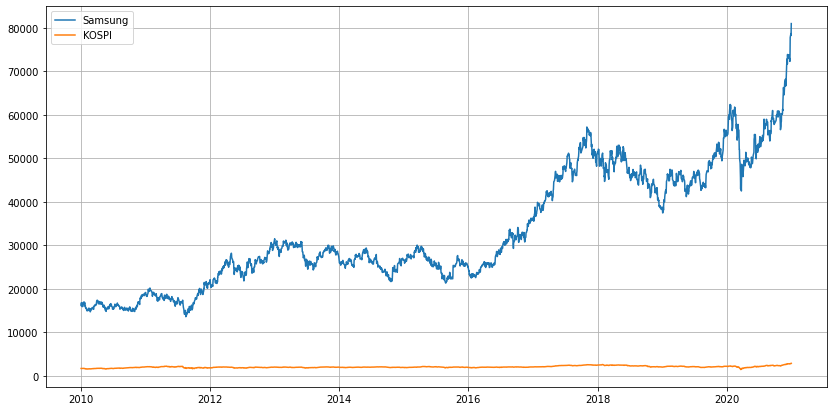

In [50]:
plt.figure(figsize=(14,7))
plt.plot(GL['Close'], label='Samsung')
plt.plot(df['Close'], label='KOSPI')
plt.grid()
plt.legend()
plt.show()